<a href="https://colab.research.google.com/github/nsk20/CMPE257-Fall23-ShyamKumar-Nalluri/blob/take-home-exam/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training error for linear model: 0.8669392995099426
Validation error for linear model: 0.8440180255525043
Training error for 2 degree polynomial model: 0.6817161708436409
Validation error for 2 degree polynomial model: 0.7780024194234473
Training error for 3 degree polynomial model: 0.4733126514640038
Validation error for 3 degree polynomial model: 0.6295333637735564
Training error for 4 degree polynomial model: 0.41102138526925747
Validation error for 4 degree polynomial model: 0.6244794315125792


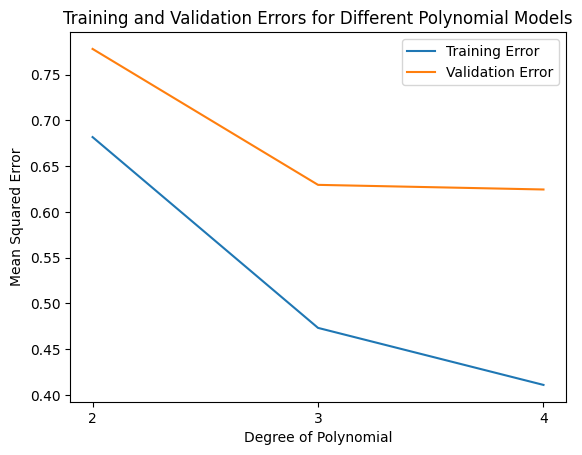

In [6]:
import numpy as np

# Load data
data = np.genfromtxt('synthetic_dataset.csv', delimiter=',', skip_header=1)
val_data = np.genfromtxt('synthetic_test_dataset.csv', delimiter=',', skip_header=1)

# Extract features and target variable
X_train = data[:, :2]
y_train = data[:, 2]

X_val = val_data[:, :2]
y_val = val_data[:, 2]

# Step 1: Train a linear model and collect the training and validation errors.
linear_model = np.linalg.lstsq(np.column_stack((X_train, np.ones_like(y_train))), y_train, rcond=None)[0]
y_train_pred_linear = np.dot(np.column_stack((X_train, np.ones_like(y_train))), linear_model)
y_val_pred_linear = np.dot(np.column_stack((X_val, np.ones_like(y_val))), linear_model)

train_error_linear = np.mean((y_train_pred_linear - y_train) ** 2)
val_error_linear = np.mean((y_val_pred_linear - y_val) ** 2)

print("Training error for linear model:", train_error_linear)
print("Validation error for linear model:", val_error_linear)

# Step 2: Train a linear model using quadratic, 3rd order, and 4th order polynomial transforms and collect the training and validation errors.
degrees = [2, 3, 4]
train_errors = []
val_errors = []

for degree in degrees:
    # Create polynomial features
    X_train_poly = np.column_stack([X_train ** d for d in range(1, degree + 1)])
    X_val_poly = np.column_stack([X_val ** d for d in range(1, degree + 1)])

    # Train a linear model with polynomial features
    poly_model = np.linalg.lstsq(np.column_stack((X_train_poly, np.ones_like(y_train))), y_train, rcond=None)[0]

    # Make predictions on training and validation sets
    y_train_pred_poly = np.dot(np.column_stack((X_train_poly, np.ones_like(y_train))), poly_model)
    y_val_pred_poly = np.dot(np.column_stack((X_val_poly, np.ones_like(y_val))), poly_model)

    # Calculate Mean Squared Error for training and validation sets
    train_error_poly = np.mean((y_train_pred_poly - y_train) ** 2)
    val_error_poly = np.mean((y_val_pred_poly - y_val) ** 2)

    train_errors.append(train_error_poly)
    val_errors.append(val_error_poly)

    print(f"Training error for {degree} degree polynomial model:", train_error_poly)
    print(f"Validation error for {degree} degree polynomial model:", val_error_poly)

# Step 3: Plot the training and validation errors by order of polynomial transforms.
import matplotlib.pyplot as plt

plt.plot(degrees, train_errors, label="Training Error")
plt.plot(degrees, val_errors, label="Validation Error")
plt.xticks(degrees)
plt.xlabel("Degree of Polynomial")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Errors for Different Polynomial Models")
plt.legend()
plt.show()



Task 4

**Observations on the Error Patterns:** Looking at the numbers, we noticed some important things. As we use more complex math (polynomial degrees), the training error gets smaller, showing that the math fits our training data better. But when we look at how well the math works on new, unseen data (validation error), things get a bit tricky. At first, the validation error goes down too, but once we hit the 4th-degree math, it starts going up. This is a sign that our math is getting too complicated and doesn't work well on new stuff. The best balance seems to be with the 3rd-degree math – it's good at fitting the data and doesn't get too confused with new information. So, we'd pick the 3rd-degree math as the best choice for our situation.

**Selecting the Model:** It seems like the 3rd-degree polynomial is the best choice. This decision is based on the fact that it has a good balance between low validation error and decent training error. The 4th-degree model, on the other hand, shows signs of overfitting, meaning it might not work well with new data. The 3rd-degree model is also a good middle ground – it's accurate enough without being too complicated, avoiding problems like overfitting and being too computationally demanding. In short, for this specific situation, the 3rd-degree polynomial model is the best pick because it finds a nice balance between accuracy and simplicity.